# Clean data and create visualizations from Nevada Sports Betting Totals: 1984-2019 report

In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn-darkgrid')

In [2]:
nv_sports = 'NV_Sports_Betting_Wins.csv'

nv_sports_df = pd.read_csv(nv_sports)
nv_sports_df.head(20)

,Year,Units,WinAmount,PerChange,WinPer,Drop,TotalGamingWin,PerTotal,WinUnit
0,1984,51,"20,899",-,2.34%,"894,564","3,092,980",0.68%,409.78
1,1985,56,"21,485",2.80%,2.52%,"851,786","3,309,372",0.65%,383.66
2,1986,59,"34,921",62.54%,3.23%,"1,081,161","3,492,474",1.00%,591.88
3,1987,67,"29,054",-16.80%,1.55%,"1,875,400","3,949,427",0.74%,433.64
4,1988,66,"42,023",44.64%,3.19%,"1,318,052","4,429,023",0.95%,636.71
5,1989,71,"45,776",8.93%,3.35%,"1,366,448","4,750,716",0.96%,644.73
6,1990,90,"48,839",6.69%,2.92%,"1,671,479","5,480,664",0.89%,542.66
7,1991,104,"52,300",7.09%,2.80%,"1,867,857","5,579,128",0.94%,502.88
8,1992,114,"50,602",-3.25%,2.81%,"1,800,783","5,864,228",0.86%,443.88
9,1993,112,"75,035",48.28%,3.74%,"2,006,283","6,247,508",1.20%,669.96


#### Citation: Nevada Sports Betting Totals: 1984-2019. Las Vegas: Center for Gaming Research, University Libraries, University of Nevada Las Vegas, 2020. Retrieved from https://gaming.unlv.edu/reports/NV_sportsbetting.pdf

In [3]:
print(nv_sports_df.dtypes)

Year               int64
Units              int64
WinAmount         object
PerChange         object
WinPer            object
Drop              object
TotalGamingWin    object
PerTotal          object
WinUnit           object
dtype: object


In [4]:
nv_sports_df.replace(',','', regex=True, inplace=True)
nv_sports_df.replace('%','', regex=True, inplace=True)

In [5]:
nv_sports_df['WinAmount'] = pd.to_numeric(nv_sports_df['WinAmount'],errors='coerce')
nv_sports_df['PerChange'] = pd.to_numeric(nv_sports_df['PerChange'],errors='coerce')
nv_sports_df['WinPer'] = pd.to_numeric(nv_sports_df['WinPer'],errors='coerce')
nv_sports_df['Drop'] = pd.to_numeric(nv_sports_df['Drop'],errors='coerce')
nv_sports_df['TotalGamingWin'] = pd.to_numeric(nv_sports_df['TotalGamingWin'],errors='coerce')
nv_sports_df['PerTotal'] = pd.to_numeric(nv_sports_df['PerTotal'],errors='coerce')
nv_sports_df['WinUnit'] = pd.to_numeric(nv_sports_df['WinUnit'],errors='coerce')

In [6]:
print(nv_sports_df.dtypes)

Year                int64
Units               int64
WinAmount           int64
PerChange         float64
WinPer            float64
Drop                int64
TotalGamingWin      int64
PerTotal          float64
WinUnit           float64
dtype: object


In [7]:
nv_sports_df.head(40)

,Year,Units,WinAmount,PerChange,WinPer,Drop,TotalGamingWin,PerTotal,WinUnit
0,1984,51,20899,NaN,2.34,894564,3092980,0.68,409.78
1,1985,56,21485,2.80,2.52,851786,3309372,0.65,383.66
2,1986,59,34921,62.54,3.23,1081161,3492474,1.00,591.88
3,1987,67,29054,-16.80,1.55,1875400,3949427,0.74,433.64
4,1988,66,42023,44.64,3.19,1318052,4429023,0.95,636.71
5,1989,71,45776,8.93,3.35,1366448,4750716,0.96,644.73
6,1990,90,48839,6.69,2.92,1671479,5480664,0.89,542.66
7,1991,104,52300,7.09,2.80,1867857,5579128,0.94,502.88
8,1992,114,50602,-3.25,2.81,1800783,5864228,0.86,443.88
9,1993,112,75035,48.28,3.74,2006283,6247508,1.20,669.96


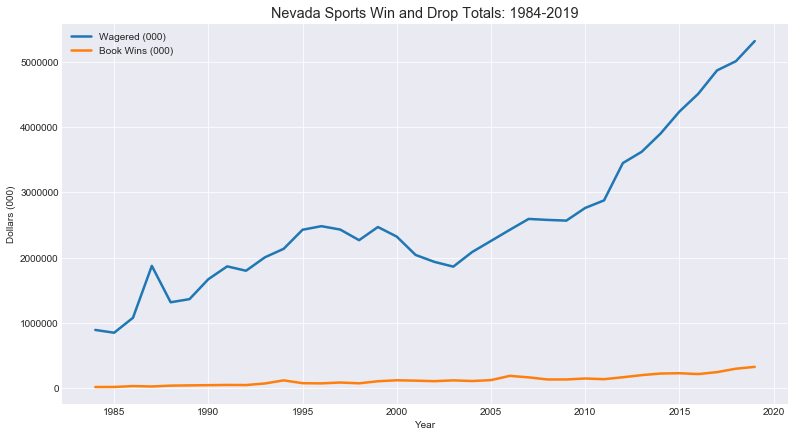

In [40]:
fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(nv_sports_df.Year.values,
         nv_sports_df.Drop.values,
         lw=2.5,
        label='Wagered (000)') 
plt.plot(nv_sports_df.Year.values,
         nv_sports_df.WinAmount.values,
         lw=2.5,label='Book Wins (000)') 

plt.title('Nevada Sports Win and Drop Totals: 1984-2019',size='x-large')
plt.xlabel('Year')
plt.ylabel('Dollars (000)')
plt.legend()

plt.savefig('./figures/NV_win_drop.png')

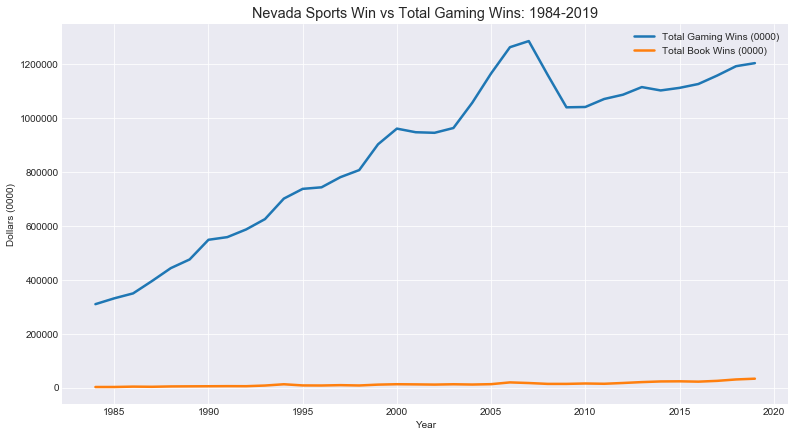

In [22]:
fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(nv_sports_df.Year.values,
         nv_sports_df.TotalGamingWin.values/10,
         lw=2.5,
        label='Total Gaming Wins (0000)') 
plt.plot(nv_sports_df.Year.values,
         nv_sports_df.WinAmount.values/10,
         lw=2.5,label='Total Book Wins (0000)') 

plt.title('Nevada Sports Win vs Total Gaming Wins: 1984-2019',size='x-large')
plt.xlabel('Year')
plt.ylabel('Dollars (0000)')
plt.legend()

plt.savefig('./figures/NV_sports_v_total.png')

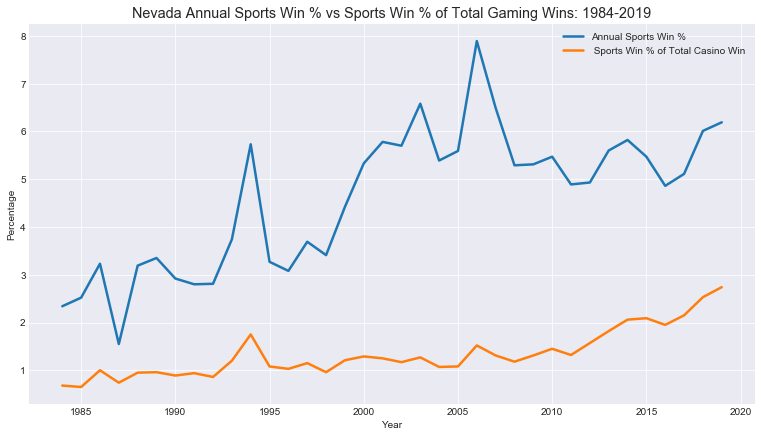

In [33]:
fig = plt.figure(figsize=(13, 7))    
    
ax = plt.subplot(111)    

ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()  

plt.plot(nv_sports_df.Year.values,
         nv_sports_df.WinPer.values,
         lw=2.5,
        label='Annual Sports Win %') 
plt.plot(nv_sports_df.Year.values,
         nv_sports_df.PerTotal.values,
         lw=2.5,label=' Sports Win % of Total Casino Win')


plt.title('Nevada Annual Sports Win % vs Sports Win % of Total Gaming Wins: 1984-2019',size='x-large')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()

plt.savefig('./figures/NV_sportswinper_v_peroftotal.png')